# Bellabeat Case Study

Google Data Analytics Professional Certificate Capstone Project

## Scenario

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a large player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat's products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. 

## 1. Ask

The goal of this case study is to analyze smart device usage data that tracks physical activity, sleep, heart rate, and weight. I will identify trends of the user data and gain insights in order to make recommendations for Bellabeat's marketing strategy. I will present my analysis and recommendations to the Bellabeat executive team. 

## 2. Prepare

The data that will be used is a public dataset named "FitBit Fitness Tracker Data". This dataset is stored on Kaggle for public share and use. It contains personal fitness tracker from 30 fitbit users, they all consented to the submission of personal tracker data for a period of 31 days between 4.12.2016 and 5.12.2016. This dataset has 18 CSV files that documents minute-level output for physical activity, heart rate, and sleep monitoring. Files that track minute-level calories, activity intensity, and steps are stored in both long and wide format, and the rest are in long format. My concern is even though long-format data is great for analysis purposes, it's very difficult to read and understand. Besides, some CSV files have incomplete or missing data, such as "weightLogInfo_merged.csv" and "sleepDay_merged.csv", which could potentially skew the accuracy of analysis results. Another limitation is the small sample size and timestamp of this dataset, which might not be representable enough to bring insights for the overall user population. For this case study, I will pick the "dailyActivity_merged.csv" and "sleepDay_merged.csv" dataset, and use R for my analysis. 

## 3. Process

### load libraries

In [6]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### import data

In [39]:
setwd('/Users/Jessicaboomboom/Desktop/Fitabase Data')

In [40]:
getwd()

[1] "/Users/Jessicaboomboom/Desktop/Fitabase Data"

In [112]:
daily_activity_merged <- 
    read.csv('dailyActivity_merged.csv') %>%
    janitor::clean_names()

In [113]:
sleep_day_merged <- 
    read.csv('sleepDay_merged.csv') %>%
    janitor::clean_names()   

### data preview

In [114]:
str(daily_activity_merged)

'data.frame':	940 obs. of  15 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ activity_date             : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ total_steps               : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ total_distance            : num  8.5 6.97 6.74 6.28 8.16 ...
 $ tracker_distance          : num  8.5 6.97 6.74 6.28 8.16 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ moderately_active_distance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ light_active_distance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ fairly_active_minutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ lightly_active_minutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ sedentary_minutes         : in

In [115]:
str(sleep_day_merged)

'data.frame':	413 obs. of  5 variables:
 $ id                  : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ sleep_day           : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ total_sleep_records : int  1 2 1 2 1 1 1 1 1 1 ...
 $ total_minutes_asleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ total_time_in_bed   : int  346 407 442 367 712 320 377 364 384 449 ...


In [116]:
head(daily_activity_merged)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [117]:
head(sleep_day_merged)

,id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


check the number of unique "id" in each dataframe

In [57]:
length(unique(daily_activity_merged$id))

[1] 33

In [58]:
length(unique(sleep_day_merged$id))

[1] 24

check the number of rows in each dataframe

In [59]:
nrow(daily_activity_merged)
nrow(sleep_day_merged)

[1] 940

[1] 413

### data cleaning and formatting

check & remove any NAs and duplicates in each dataframe

In [62]:
sum(duplicated(daily_activity_merged))

[1] 0

In [118]:
sum(duplicated(sleep_day_merged))

[1] 3

In [119]:
sum(is.na(daily_activity_merged))

[1] 0

In [120]:
sum(is.na(sleep_day_merged))

[1] 0

In [121]:
daily_activity_merged <- 
    daily_activity_merged %>%
    drop_na()

In [122]:
sleep_day_merged <- unique(sleep_day_merged)

In [123]:
nrow(sleep_day_merged)

[1] 410

reformat and rename the Date column in both dataframes to make them consistent

In [124]:
daily_activity_merged <- 
    daily_activity_merged %>%
    rename(date = activity_date) 

In [126]:
sleep_day_merged <- 
    sleep_day_merged %>%
    rename(date = sleep_day) 

In [128]:
sleep_day_merged$date <- substr(sleep_day_merged$date, 1, 9)

## Analyze + Share

### merge the two dataframes by ID and date

In [136]:
daily_activity_new <- 
    merge(daily_activity_merged, sleep_day_merged, by = c("id", "date"))

In [139]:
head(daily_activity_new)

,id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_sleep_records,total_minutes_asleep,total_time_in_bed
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


### summary statistics

In [140]:
summary(daily_activity_new)

       id                date            total_steps    total_distance  
 Min.   :1.504e+09   Length:295         Min.   :   17   Min.   : 0.010  
 1st Qu.:3.977e+09   Class :character   1st Qu.: 5053   1st Qu.: 3.500  
 Median :4.703e+09   Mode  :character   Median : 8925   Median : 6.180  
 Mean   :4.965e+09                      Mean   : 8427   Mean   : 5.957  
 3rd Qu.:6.869e+09                      3rd Qu.:11187   3rd Qu.: 7.940  
 Max.   :8.792e+09                      Max.   :22359   Max.   :17.190  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.010   Min.   :0.000              Min.   : 0.000      
 1st Qu.: 3.500   1st Qu.:0.000              1st Qu.: 0.000      
 Median : 6.180   Median :0.000              Median : 0.560      
 Mean   : 5.951   Mean   :0.104              Mean   : 1.448      
 3rd Qu.: 7.900   3rd Qu.:0.000              3rd Qu.: 2.415      
 Max.   :17.190   Max.   :4.082              Max.   :12.540      
 moderately_active_distance

In [141]:
str(daily_activity_new)

'data.frame':	295 obs. of  18 variables:
 $ id                        : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ date                      : chr  "4/12/2016" "4/13/2016" "4/15/2016" "4/16/2016" ...
 $ total_steps               : int  13162 10735 9762 12669 9705 15506 10544 9819 14371 10039 ...
 $ total_distance            : num  8.5 6.97 6.28 8.16 6.48 ...
 $ tracker_distance          : num  8.5 6.97 6.28 8.16 6.48 ...
 $ logged_activities_distance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_distance      : num  1.88 1.57 2.14 2.71 3.19 ...
 $ moderately_active_distance: num  0.55 0.69 1.26 0.41 0.78 ...
 $ light_active_distance     : num  6.06 4.71 2.83 5.04 2.51 ...
 $ sedentary_active_distance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ very_active_minutes       : int  25 21 29 36 38 50 28 19 41 39 ...
 $ fairly_active_minutes     : int  13 19 34 10 20 31 12 8 21 5 ...
 $ lightly_active_minutes    : int  328 217 209 221 164 264 205 211 262 238 ...
 $ sedentary_minutes         : in

### create visualizations to identify trends and relationships

check if there's correlation between daily steps and daily calories

Note: There is a positive correlation between daily steps and calories - the more steps taken, the more calories burned.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



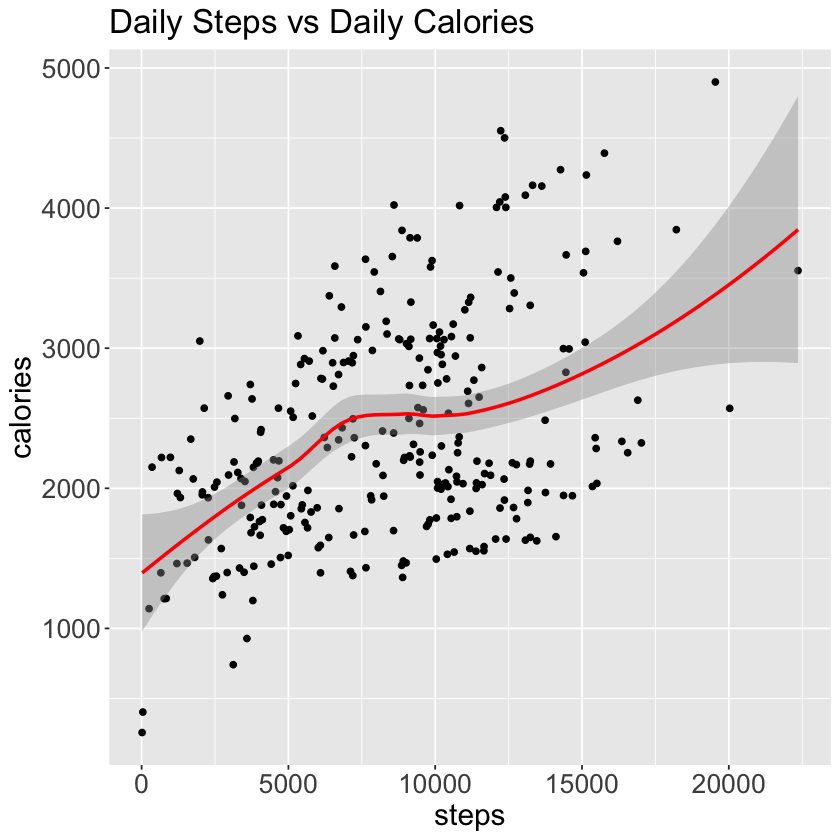

In [176]:
ggplot(daily_activity_new, aes(x=total_steps, y=calories))+ 
    geom_point() +
    geom_smooth(color = "red") + 
    labs(title = "Daily Steps vs Daily Calories ", x = "steps", y= "calories") +
    theme(
        plot.title = element_text(size=20), 
        axis.title =element_text(size=18),
        axis.text=element_text(size=16))

check if there's correlation between daily steps and daily sleep

Note: This is an interesting trend, there is not a significant relationship between the daily steps and sleep. 
Different from the plot above, as users take more steps every day, the amount of their sleep slightly decreases and then go back up slowly.
However, we can see that the majority of users sleep around 400 minutes per day.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



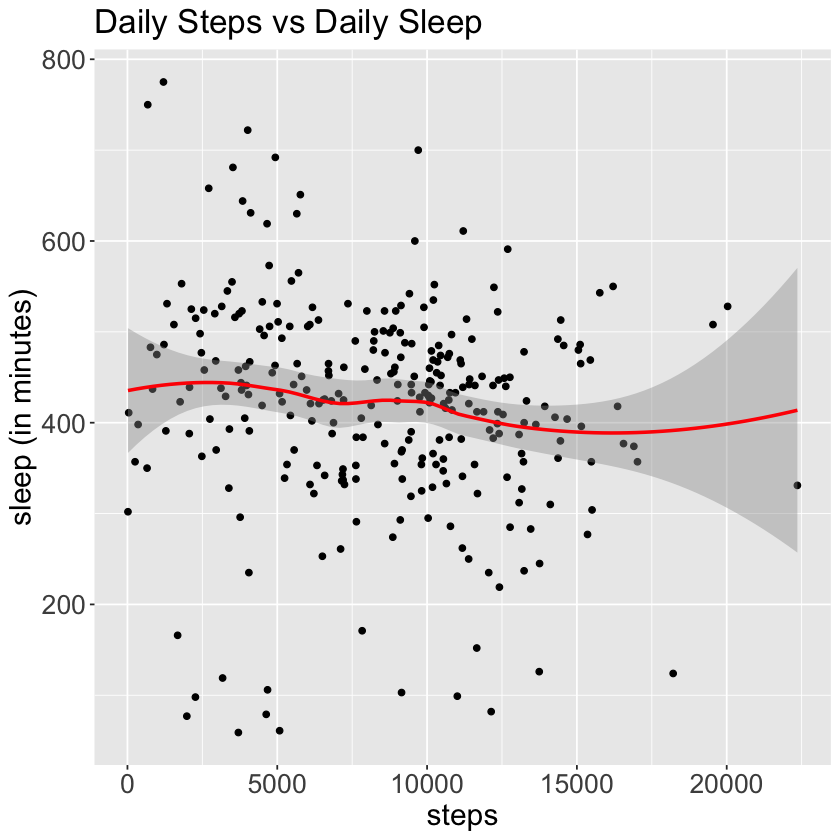

In [181]:
ggplot(daily_activity_new, aes(x=total_steps, y=total_minutes_asleep))+ 
    geom_point() +
    geom_smooth(color = "red") + 
    labs(title = "Daily Steps vs Daily Sleep ", x = "steps", y= "sleep (in minutes)") +
    theme(
        plot.title = element_text(size=20), 
        axis.title =element_text(size=18),
        axis.text=element_text(size=16))

check if there's correlation between daily calories and daily sleep

Note: As we can see in the plot, the majority of calories users burned are between 1000 and 4000 calories.
Even though there is not a significant relationship between these two variables, 
we can observe a slight positive trend that users sleep more as they burn more calories. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



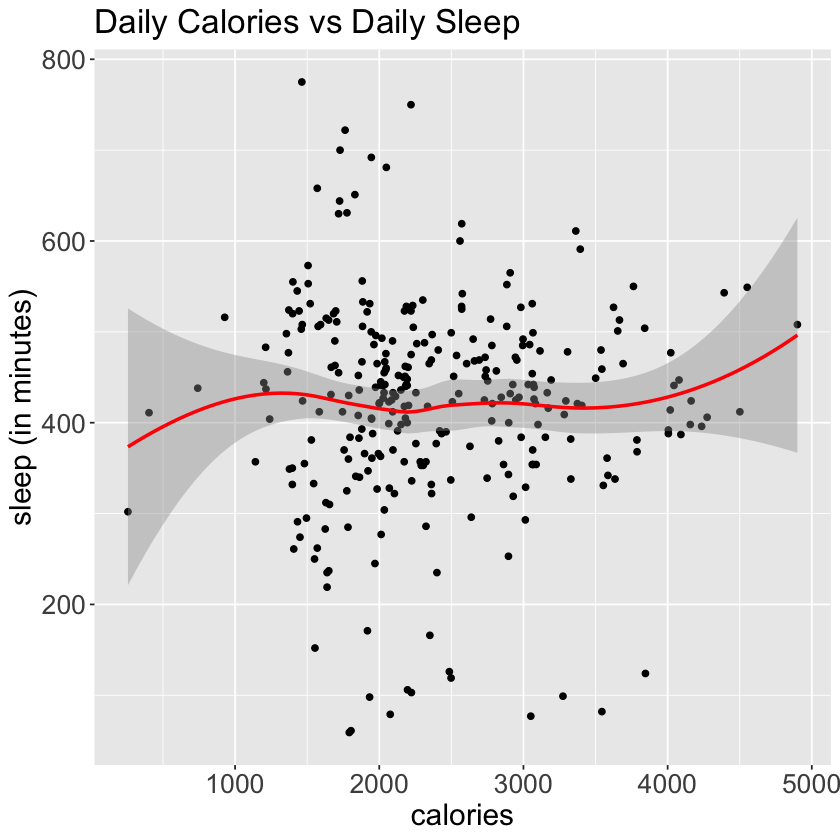

In [182]:
ggplot(daily_activity_new, aes(x=calories, y=total_minutes_asleep))+ 
    geom_point() +
    geom_smooth(color = "red") + 
    labs(title = "Daily Calories vs Daily Sleep ", x = "calories", y= "sleep (in minutes)") +
    theme(
        plot.title = element_text(size=20), 
        axis.title =element_text(size=18),
        axis.text=element_text(size=16))

## Act

This analysis on the smart device usage data brings some insights on how users daily habits of physical activity affect their health and sleep. As users take more steps every day, they tend to burn more calories and sleep more. My recommendation for Bellabeat's marketing strategy is we should focus on how our product helps women track their wellness, develop healthier lifestyles, and achieve their fitness goals. However, I think this dataset can only be used as a reference and we should track our own device data for more accurate results. There are several limitations of this dataset, as I have mentioned before, the small sample size and outdated timestamp. In addition, the lack of demographics information makes it difficult to know whether these users have similar or very different lifestyles, which can dramatically influence the accuracy of analysis. For future analysis, it would be helpful to investigate the activity and health data for different types of users: sedentary, moderately active, and very active users. This could help tailoring our marketing strategy and focus more on the target user population. 